In [44]:
import math 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [45]:
def f(x):
    return 3*x**2 - 4*x + 5

In [46]:
f(3)

20

In [47]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

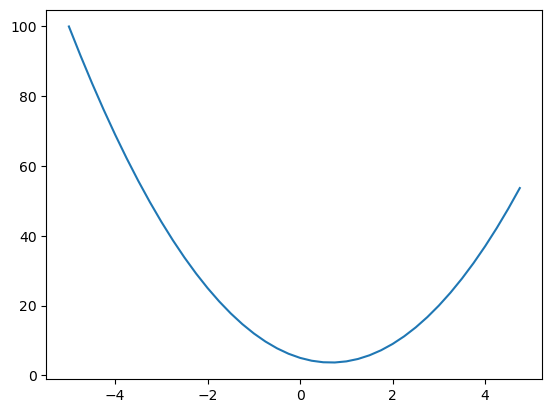

In [48]:
plt.plot(xs,ys)

---

## 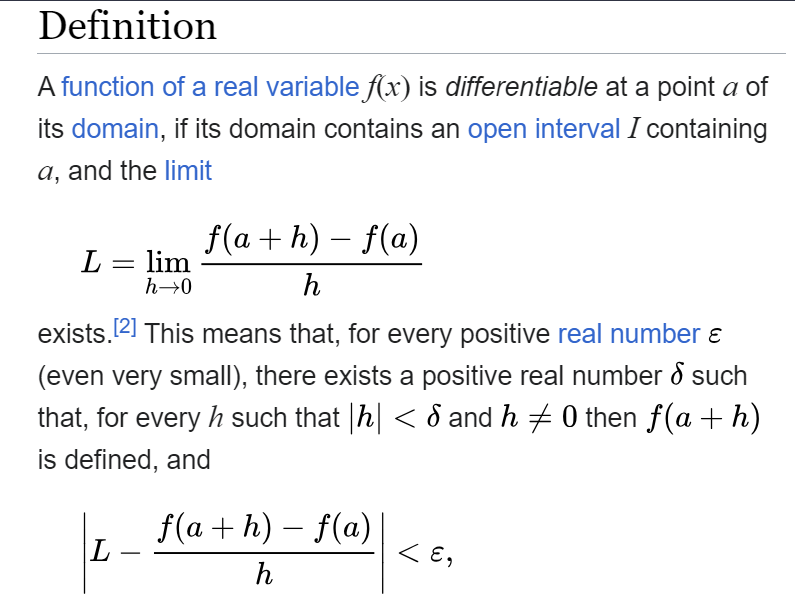


In [49]:
h = 0.0000001
x = 3
f(x) , f(x + h)

(20, 20.00000140000003)

In [50]:
(f(x+h) - f(x)) / h

14.000000305713911

In [51]:
def dy_f(x):
    return 6 * x - 4

In [52]:
dy_f(x) # Same As (f(x+h) - f(x)) / h --> 14.000000305713911

14

In [53]:
class Value:
    def __init__(self,data,_children=(),_op='',label = '')-> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0
    def __repr__(self) -> str:
        return f"Value(data={self.data})" 
    
    def __add__(self,other):
        return Value(self.data + other.data, (self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data, (self,other),'*')
    
    def __sub__(self,other):
        return Value(self.data - other.data, (self,other),'-')



In [54]:
Value(data=2)

Value(data=2)

In [55]:
a = Value(2)
b = Value(3)

x = a + b

In [56]:
x._prev , x._op

({Value(data=2), Value(data=3)}, '+')

In [57]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes: 
      nodes.add(v) # just add every node at nodes list
      for child in v._prev:
        edges.add((child, v))  # just add every conction between Node and child node at  edg  list
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [58]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

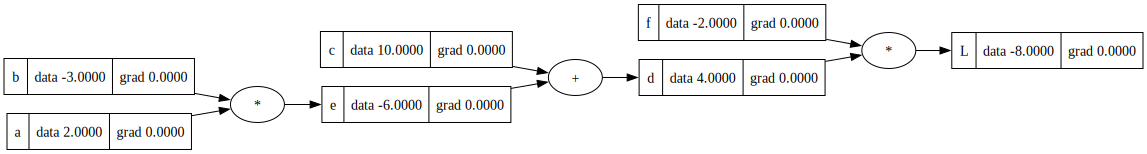

In [59]:
draw_dot(L)

In [60]:
L.grad = 1 # l = L | dL/L = 1 
########################################################################################
f.grad = 4 # l = f * d | dl/df = d
# prove 
# f(f + h) - f(x) / h 
# (f+h) * d - f*d / h
# f*d + h*d - f*d / h
# h*d / h -> d
########################################################################################
d.grad = -2 # l = f * d | dl/dd = f
########################################################################################
c.grad = -2 # d = c + e | dd/dc = 1 (local gradian) | know dl/dc = dl/dd * dd/dc = f * 1
# prove 
# f(c + h) - f(c) / h 
# (f+h) + e - (f+e) / h
# c + h + e - c -e / h
# h / h -> 1
########################################################################################
e.grad = -2 # d = c + e | dd/de = 1 (local gradian) | know dl/de = dl/dd * dd/dc = f * 1
#########################################################################################
b.grad = -4 # e = b * a | dl/db = dl/dd * dd/de * de/db  -or-> dl/de * de/db | -2 * a
########################################################################################
a.grad = 6 # e = b * a | dl/da = dl/dd * dd/de * de/da   -or-> dl/de * de/da | -2 * b
 

In [61]:
def gradian_check():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
 
  L = d * f; L.label = 'L'
 
  L2 = L.data
  
  print((L2 - L1)/h)
  
gradian_check()

-3.9999999999995595


## Other example On Nerual Net


In [62]:
# We will updata class for Tanh
class Value:
    def __init__(self,data,_children=(),_op='',label = '')-> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0

    def __repr__(self) -> str:
        return f"Value(data={self.data})" 
    
    def __add__(self,other):
        return Value(self.data + other.data, (self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data, (self,other),'*')
    
    def __sub__(self,other):
        return Value(self.data - other.data, (self,other),'-')
    def tanh(self):
        x = self.data
        tanh = (np.exp(2*x) -1) / (np.exp(2*x) + 1)
        return Value(tanh,(self,),'Tanh')    


In [63]:
# Inputs
x1 =  Value(2.0, label='x1')
x2 =  Value(0.0, label='x2')
# Weights 
W1 = Value(-3.0, label='w1')
W2 = Value(1.0, label='w1')
b = Value(6.8813735870195432, label='b')
####|x1*w1 + x2*w2 + b|#####
x1W1 = x1*W1; x1W1.label = 'x1*W1'
x2W2 = x2*W2; x2W2.label = 'x2*W2'
###########################
x1W1x2W2 = x1W1 + x2W2; x1W1x2W2.label = 'x1*W1 + x2*W2'
n = x1W1x2W2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

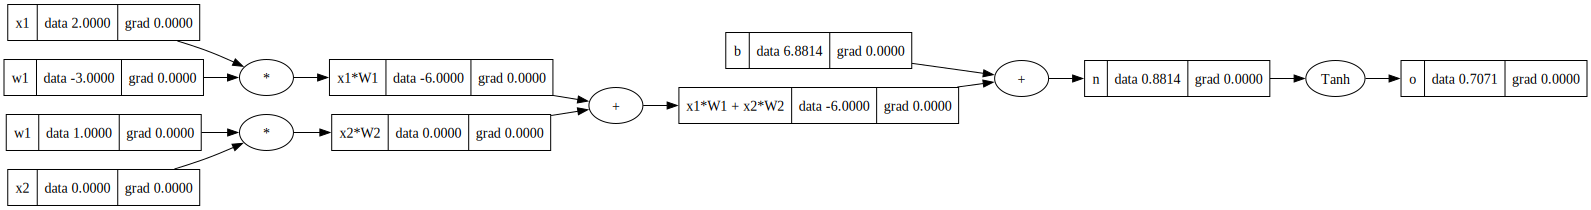

In [64]:
draw_dot(o)

### Derivative of tanh

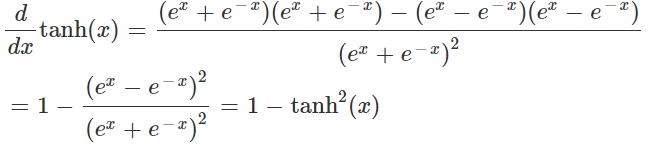


In [65]:
o.grad = 1     # base case
####################################################################
n.grad = 0.5   #1 - (n.data ** 2)  # o = Tanh(n) | do/dn = 1 - n^2 
####################################################################
b.grad = 0.5        # do/dn  *  dn/db -> 0.5 * 1
x1W1x2W2.grad = 0.5 # do/dn  *  dn/d(x1W1x2W2) -> 0.5 * 1
####################################################################
x1W1.grad = 0.5
x2W2.grad = 0.5
####################################################################
x1.grad = W1.data * x1W1.grad
x2.grad = W2.data * x2W2.grad
W1.grad = x1.data * x1W1.grad
W2.grad = x2.data * x1W1.grad

## Implement backpropagationn automatically.


In [66]:

class Value:
    def __init__(self,data,_children=(),_op='',label = '')-> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0
        self._backward = lambda : None 
    def __repr__(self) -> str:
        return f"Value(data={self.data})" 
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other),'+')
        other = other if isinstance(other, Value) else Value(other)
        def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dout/dx -> (1)
            '''
            self.grad +=  1  *  out.grad 
            other.grad += 1  *  out.grad
        out._backward = _backward
        
        return out
    
    def __radd__(self,other):
        return self * other
    
    def __rsub__(self,other):
        return self * other
       
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')
        def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dy/dx exp(x) -> dy/dx exp(x)
            '''
            self.grad  += out.data * out.grad
        out._backward = _backward

    def __mul__(self,other):
         out = Value(self.data * other.data, (self,other),'*')
         other = other if isinstance(other, Value) else Value(other)
         def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dout/dx -> other.data
            '''
            self.grad  +=  other.data * out.grad
            other.grad += self.data * out.grad
         out._backward = _backward
        
         return out
    def __pow__(self, other):
         assert isinstance(other, (int, float)), "only supporting int/float powers for now"
         out = Value(self.data**other, (self,), f'**{other}')

         def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout -> out.grad
            local_gradiant  -> dout/dx -> dy/dx(x^n) -> n(x^(n-1))
            '''
            self.grad += other.data * (self.data ** (other.data - 1)) * out.grad
         out._backward = _backward

         return out
    
    def __rmul__(self,other): # to Hendel 1 * Value case
        return self * other
    
    def __truediv__(self, other): # to 
        return self * other**-1

    def __neg__(self): 
        return self * -1


    def __sub__(self,other):
        out = Value(self.data - other.data, (self,other),'-')
        def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dout/dx -> (-1)
            '''
            self.grad +=  -1  *  out.grad
            other.grad += -1  *  out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        '''
        Just _backward the _backward Derivative
        '''
        x = self.data
        tanh = (np.exp(2*x) -1) / (np.exp(2*x) + 1)
        out = Value(tanh,(self,),'Tanh')    
        def _backward():
            self.grad  += (1 - (tanh ** 2)) * out.grad
        out._backward = _backward

        return out
    
    def _backward(self):
        Node_Topo_order = []
        seen = set()
        def Topo_Sort(Node):
            if Node not in seen:
                seen.add(Node)
                for v in Node._prev:
                    Topo_Sort(v)
                Node_Topo_order.append(Node)

        Topo_Sort(self)
        self.grad = 1
       
        for n in reversed(Node_Topo_order):
            n._backward()



In [67]:
# Inputs
x1 =  Value(2.0, label='x1')
x2 =  Value(0.0, label='x2')
# Weights 
W1 = Value(-3.0, label='w1')
W2 = Value(1.0, label='w1')
b = Value(6.8813735870195432, label='b')
####|x1*w1 + x2*w2 + b|#####
x1W1 = x1*W1; x1W1.label = 'x1*W1'
x2W2 = x2*W2; x2W2.label = 'x2*W2'
###########################
x1W1x2W2 = x1W1 + x2W2; x1W1x2W2.label = 'x1*W1 + x2*W2'
n = x1W1x2W2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

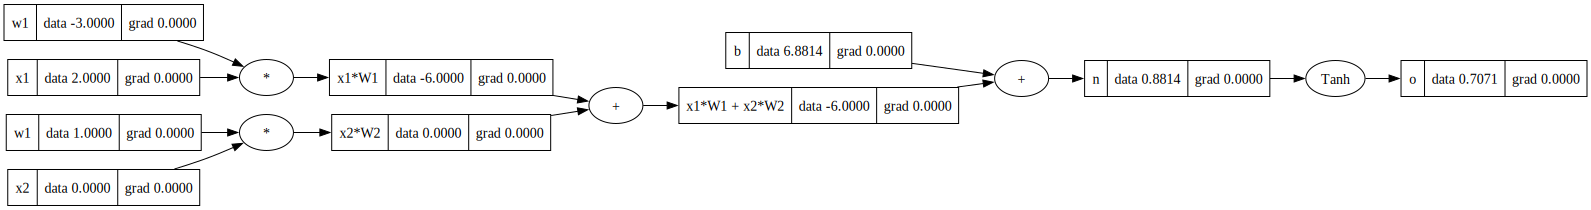

In [68]:
draw_dot(o)

In [69]:
o._backward()

In [70]:
o.grad = 1 # must set bias case
n._backward()
b._backward()
x1W1x2W2._backward()
x1W1._backward()
x2W2._backward()
x1._backward()
W1._backward()
x2._backward()
W2._backward()

## Topological sort of a directed graph

- Just Implementation of depth-first on the Graph.
- Just list of Graph node is sorted from down to top - left-right order.
- And Activation for backward in this order


In [71]:
Node_Topo_order = []
seen = set()
def Topo_Sort(Node):
    if Node not in seen:
        seen.add(Node)
        for v in Node._prev:
             Topo_Sort(v)
        Node_Topo_order.append(Node)

Topo_Sort(o)

In [72]:
Node_Topo_order

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

## Build Nerual Net


In [73]:
import math 
import numpy as np 



class Value:
    def __init__(self,data,_children=(),_op='',label = '')-> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0
        self._backward = lambda : None 
    def __repr__(self) -> str:
        return f"Value(data={self.data})" 
    
    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self,other),'+')
        def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dout/dx -> (1)
            '''
            self.grad +=  1  *  out.grad 
            other.grad += 1  *  out.grad
        out._backward = _backward
        
        return out
    
    def __radd__(self,other):
        return self * other
    
   
       
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')
        def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dy/dx exp(x) -> dy/dx exp(x)
            '''
            self.grad  += out.data * out.grad
        out._backward = _backward
        return out
    

    def __mul__(self,other):
         other = other if isinstance(other, Value) else Value(other)
         out = Value(self.data * other.data, (self,other),'*')
        
         def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dout/dx -> other.data
            '''
            self.grad  +=  other.data * out.grad
            other.grad += self.data * out.grad
         out._backward = _backward
        
         return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout -> out.grad
            local_gradiant  -> dout/dx -> dy/dx(x^n) -> n(x^(n-1))
            '''
            self.grad += other * (self.data ** (other - 1)) * out.grad
       
        out._backward = _backward
        return out
    
    def __rmul__(self,other): # to Hendel 1 * Value case
        return self * other
    
    def __truediv__(self, other): # to 
        return self * other**-1

    def __neg__(self): 
        return self * -1


    def __sub__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data - other.data, (self,other),'-')
        def _backward():
            '''
            grad = local_gradiant * global_gradiant  
            global_gradiant -> dl/dout 
            local_gradiant  -> dout/dx -> (-1)
            '''
            self.grad +=  -1  *  out.grad
            other.grad += -1  *  out.grad
        out._backward = _backward

        return out
    def __rsub__(self,other):
        return self * other
    
    def tanh(self):
        '''
        Just backward the backward Derivative
        '''
        x = self.data
        tanh = (np.exp(2*x) -1) / (np.exp(2*x) + 1)
        out = Value(tanh,(self,),'Tanh')    

        def _backward():
            self.grad  += (1 - (tanh ** 2)) * out.grad
        out._backward = _backward

        return out
    
    def sigmoid(self):
        x = self.data
        sigmoid = 1 /  1 +(math.exp(-x))
        out = Value(sigmoid,(self,),'Sigmoid')    

        def _backward():
            self.grad  += (sigmoid * (1 - sigmoid)) * out.grad
        out._backward = _backward
        return out

    def relu(self):
        if self.data < 0 :
            out = Value(0 , (self,), 'ReLU')
        else:
            out = Value(self.data , (self,), 'ReLU')
     
        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out
    
    def backward(self):
        Node_Topo_order = []
        seen = set()
        def Topo_Sort(Node):
            if Node not in seen:
                seen.add(Node)
                for v in Node._prev:
                    Topo_Sort(v)
                Node_Topo_order.append(Node)

        Topo_Sort(self)
        self.grad = 1
       
        for n in reversed(Node_Topo_order):
            n._backward()


In [74]:



class Neuron:
    def __init__(self,nin) -> None:
        self.weights =  []
        for _ in range(nin):
            self.weights.append(Value(np.random.uniform(-1,1)))
        self.bias = Value(0)
    def __call__(self, X,actvtion='tanh'):
        act = self.bias
        for wi,xi in zip(self.weights,X):
            act += wi * xi
        if actvtion == "tanh":  
            out = act.tanh()    
        else:
            out = act # no actvtion function    
        return out 
    
    def parameters(self):
        return self.weights + [self.bias]

    def __repr__(self) -> str:
        return f"Neuron(wegihts={self.weights} ,bias={self.bias})"    

class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

    



In [75]:
n = Neuron(3)
n

Neuron(wegihts=[Value(data=-0.4646703364655653), Value(data=-0.8078723190357855), Value(data=-0.7391604512411993)] ,bias=Value(data=0))

In [76]:
x = [2,5]
n(x)

Value(data=-0.9999033394969348)

In [77]:
m = Layer(3,3)
m(x)

[Value(data=0.9335438635563681),
 Value(data=0.9969578782415013),
 Value(data=-0.9182899290210338)]

In [78]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.22969018101151972)

In [79]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [80]:
for k in range(10):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data -= -0.1 * p.grad
  
  print(k, loss.data)

0 3.7477264606184977
1 0.7306164762216325
2 0.3214893723023577
3 0.2011525509373366
4 0.14415701654600202
5 0.11073802482281242
6 0.08908369283563655
7 0.07405080217808127
8 0.0630750822244088
9 0.05474794084975758


In [81]:
ypred

[Value(data=0.7943681293793672),
 Value(data=-0.8862930804642044),
 Value(data=-0.8804188279284977),
 Value(data=0.8341114211723922)]

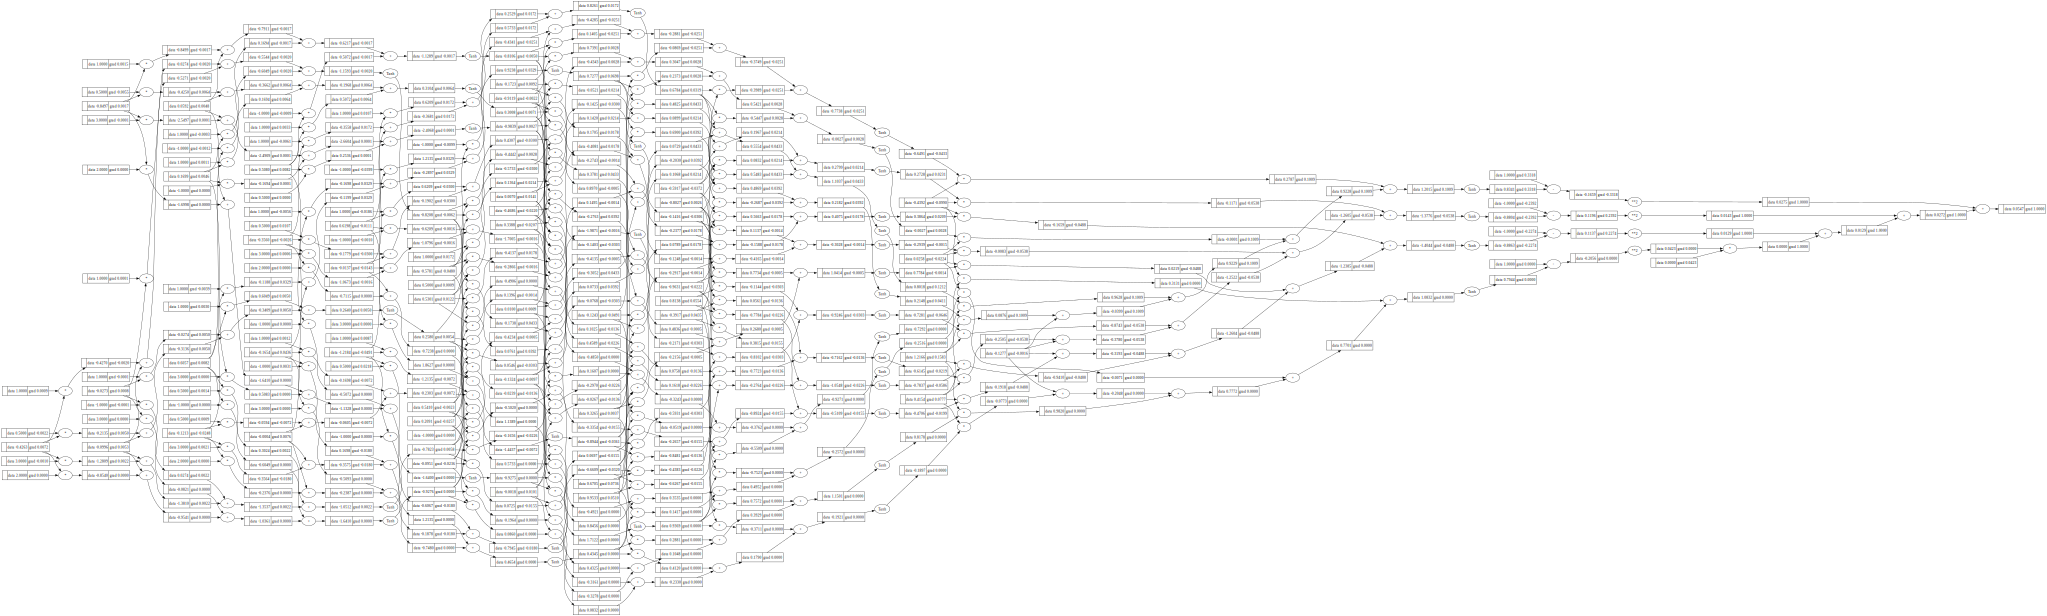

In [82]:
draw_dot(loss)